# Tesla Stock Data Columns Description

This dataset contains historical Tesla stock trading information. Below is a description of each column:

- **date**: The date of the trading session in the format YYYY-MM-DD.

- **open**: The price at which Tesla's stock started trading at the beginning of the trading session.

- **high**: The highest price Tesla's stock reached during the trading session.

- **low**: The lowest price Tesla's stock reached during the trading session.

- **close**: The price at which Tesla's stock ended trading at the close of the trading session.

- **volume**: The total number of Tesla shares traded during the trading session.

- **adjusted_close**: The closing price adjusted for any stock splits and dividends, providing a more accurate reflection of the stock's value over time.

- **change_percent**: The percentage change in the closing price compared to the previous trading day. This indicates daily price movement as a percentage.

- **avg_vol_20d**: The 20-day moving average of the trading volume. This shows the average number of Tesla shares traded daily over the last 20 trading sessions.


![d](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### DATASET LOADING

importing

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import statsmodels.api as sm 

In [7]:
TS = pd.read_csv('tesla_2010to2024.csv')

In [8]:
TS.tail()

date    open      high       low   close     volume  \
3467  2024-04-09  172.91  179.2200  171.9200  176.88  103232703   
3468  2024-04-10  173.04  174.9300  170.0100  171.76   84532406   
3469  2024-04-11  172.55  175.8800  168.5100  174.60   94515992   
3470  2024-04-12  172.34  173.8099  170.3644  171.05   64722672   
3471  2024-04-15  170.24  170.6900  161.3800  161.48  100245310   

      adjusted_close  change_percent  avg_vol_20d  
3467          176.88            2.25  96874603.60  
3468          171.76           -2.89  96731639.90  
3469          174.60            1.65  96131214.90  
3470          171.05           -2.03  93051063.75  
3471          161.48           -5.59  93205987.85

<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### OVERVIEW OF DATASET

In [12]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3472 non-null   object 
 1   open            3472 non-null   float64
 2   high            3472 non-null   float64
 3   low             3472 non-null   float64
 4   close           3472 non-null   float64
 5   volume          3472 non-null   int64  
 6   adjusted_close  3472 non-null   float64
 7   change_percent  3471 non-null   float64
 8   avg_vol_20d     3453 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 244.3+ KB


#### so **2** action requires here from
1. correcting type of column **date** and **change_percent**

2. Filling missing values of **change_percent** and **avg_vol_20d**

since there is not datatype for percentage so we will keep it as it is

In [14]:
TS.describe()

open         high          low        close        volume  \
count  3472.000000  3472.000000  3472.000000  3472.000000  3.472000e+03   
mean    305.690278   312.419580   298.713120   305.740220  2.357981e+07   
std     289.068278   297.040395   280.931334   289.265494  4.035666e+07   
min      16.140000    16.629900    14.979900    15.800100  1.186140e+05   
25%     154.696200   160.307475   150.677475   153.360000  3.265562e+06   
50%     233.439900   237.435000   229.099950   232.995050  6.945234e+06   
75%     337.035075   343.424775   331.327575   335.967450  2.152074e+07   
max    2295.120000  2318.490000  2186.520000  2238.750000  3.065906e+08   

       adjusted_close  change_percent   avg_vol_20d  
count     3472.000000     3471.000000  3.453000e+03  
mean        72.985387        0.196765  9.696034e+07  
std        101.941795        3.574390  6.331152e+07  
min          1.053300      -21.060000  4.317139e+06  
25%         11.114825       -1.600000  5.625444e+07  
50%         17.182350        0.120000  8.969658e+07  
75%        140.345025        1.920000  1.270215e+08  
max        409.970000       24.400000  3.886315e+08

### Insights:

1. **Price Range**:
   - The stock price has a wide range, with the min close price at $15.80, $2238.75 max, showing significant growth potential over time.

2. **Trading Volume**:
   - The average daily trading volume is approximately 23.58 million shares, but there are days with trading volumes as low as 118,614 shares and as high as 306.59 million shares.

3. **Adjusted Close**:
   - The adjusted close price ranges from $1.05 to $409.97, reflecting the impact of stock splits and dividends.

4. **Change Percent**:
   - The daily percentage change ranges from -21.06% to +24.40%, indicating high volatility in Tesla's stock price.
   
5. **Average Volume (20-day)**:
   - The 20-day moving average volume ranges from 4.317 million to 388.63 million shares, showing fluctuating market activity over time.

This statistical analysis highlights Tesla's stock's growth, volatility, and trading activity, making it a compelling subject for further financial analysis and modeling.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### DATA CLEANING

### correcting types

In [24]:
TS['date'] = pd.to_datetime(TS['date'], errors='coerce')

filling missing values of **change_percent** and **avg_vol_20d**  
- before filling missing values we need to see **Record of missing values** and **distribution** of data

### INDENTIFYING 
> MISSING VALUES 

In [28]:
MissingChange_percent = TS[TS['change_percent'].isna()]
MissingChange_percent

date     open     high      low    close    volume  adjusted_close  \
0 2010-06-29  18.9999  24.9999  17.5401  23.8899  18783278          1.5927   

   change_percent  avg_vol_20d  
0             NaN          NaN

In [30]:
MissingAvg_vol_20d = TS[TS['avg_vol_20d'].isna()]
MissingAvg_vol_20d

date     open     high      low    close    volume  adjusted_close  \
0  2010-06-29  18.9999  24.9999  17.5401  23.8899  18783278          1.5927   
1  2010-06-30  25.7901  30.4191  23.3001  23.8299  17194392          1.5887   
2  2010-07-01  24.9999  25.9200  20.2701  21.9600   8229862          1.4640   
3  2010-07-02  23.0001  23.1000  18.7101  19.2000   5141806          1.2800   
4  2010-07-06  20.0001  20.0001  15.8301  16.1100   6879295          1.0740   
5  2010-07-07  16.4001  16.6299  14.9799  15.8001   6924913          1.0533   
6  2010-07-08  16.1400  17.5200  15.5700  17.4600   7719539          1.1640   
7  2010-07-09  17.5800  17.9001  16.5501  17.4000   4058605          1.1600   
8  2010-07-12  17.9499  18.0699  17.0001  17.0499   2203569          1.1367   
9  2010-07-13  17.3940  18.6399  16.8999  18.1401   2680059          1.2093   
10 2010-07-14  17.9400  20.1501  17.7600  19.8399   4196109          1.3227   
11 2010-07-15  19.9401  21.5001  18.9999  19.8900   3745296          1.3260   
12 2010-07-16  20.7000  21.3000  20.0499  20.6400   2621209          1.3760   
13 2010-07-19  21.3699  22.2501  20.9199  21.9099   2486488          1.4607   
14 2010-07-20  21.8499  21.8499  20.0499  20.3001   1825230          1.3533   
15 2010-07-21  20.6601  20.9001  19.5000  20.2200   1253441          1.3480   
16 2010-07-22  20.4999  21.2499  20.3700  21.0000    962344          1.4000   
17 2010-07-23  21.1899  21.5601  21.0600  21.2901    654049          1.4193   
18 2010-07-26  21.5001  21.5001  20.3001  20.9499    922452          1.3967   

    change_percent  avg_vol_20d  
0              NaN          NaN  
1            -0.25          NaN  
2            -7.85          NaN  
3           -12.57          NaN  
4           -16.09          NaN  
5            -1.93          NaN  
6            10.51          NaN  
7            -0.34          NaN  
8            -2.01          NaN  
9             6.39          NaN  
10            9.38          NaN  
11            0.25          NaN  
12            3.77          NaN  
13            6.16          NaN  
14           -7.35          NaN  
15           -0.39          NaN  
16            3.86          NaN  
17            1.38          NaN  
18           -1.59          NaN

#### FIlling Missing Value - Reasoning
1. As our missing values is at start
2. our dataset is huge so we can ignore these missing values

### OUTLIERS

In [34]:
sns.set_style('whitegrid')
sns.set_palette('Dark2')

https://seaborn.pydata.org/tutorial/color_palettes.html

##### to make our graph interactive we use 

In [38]:
%matplotlib widget

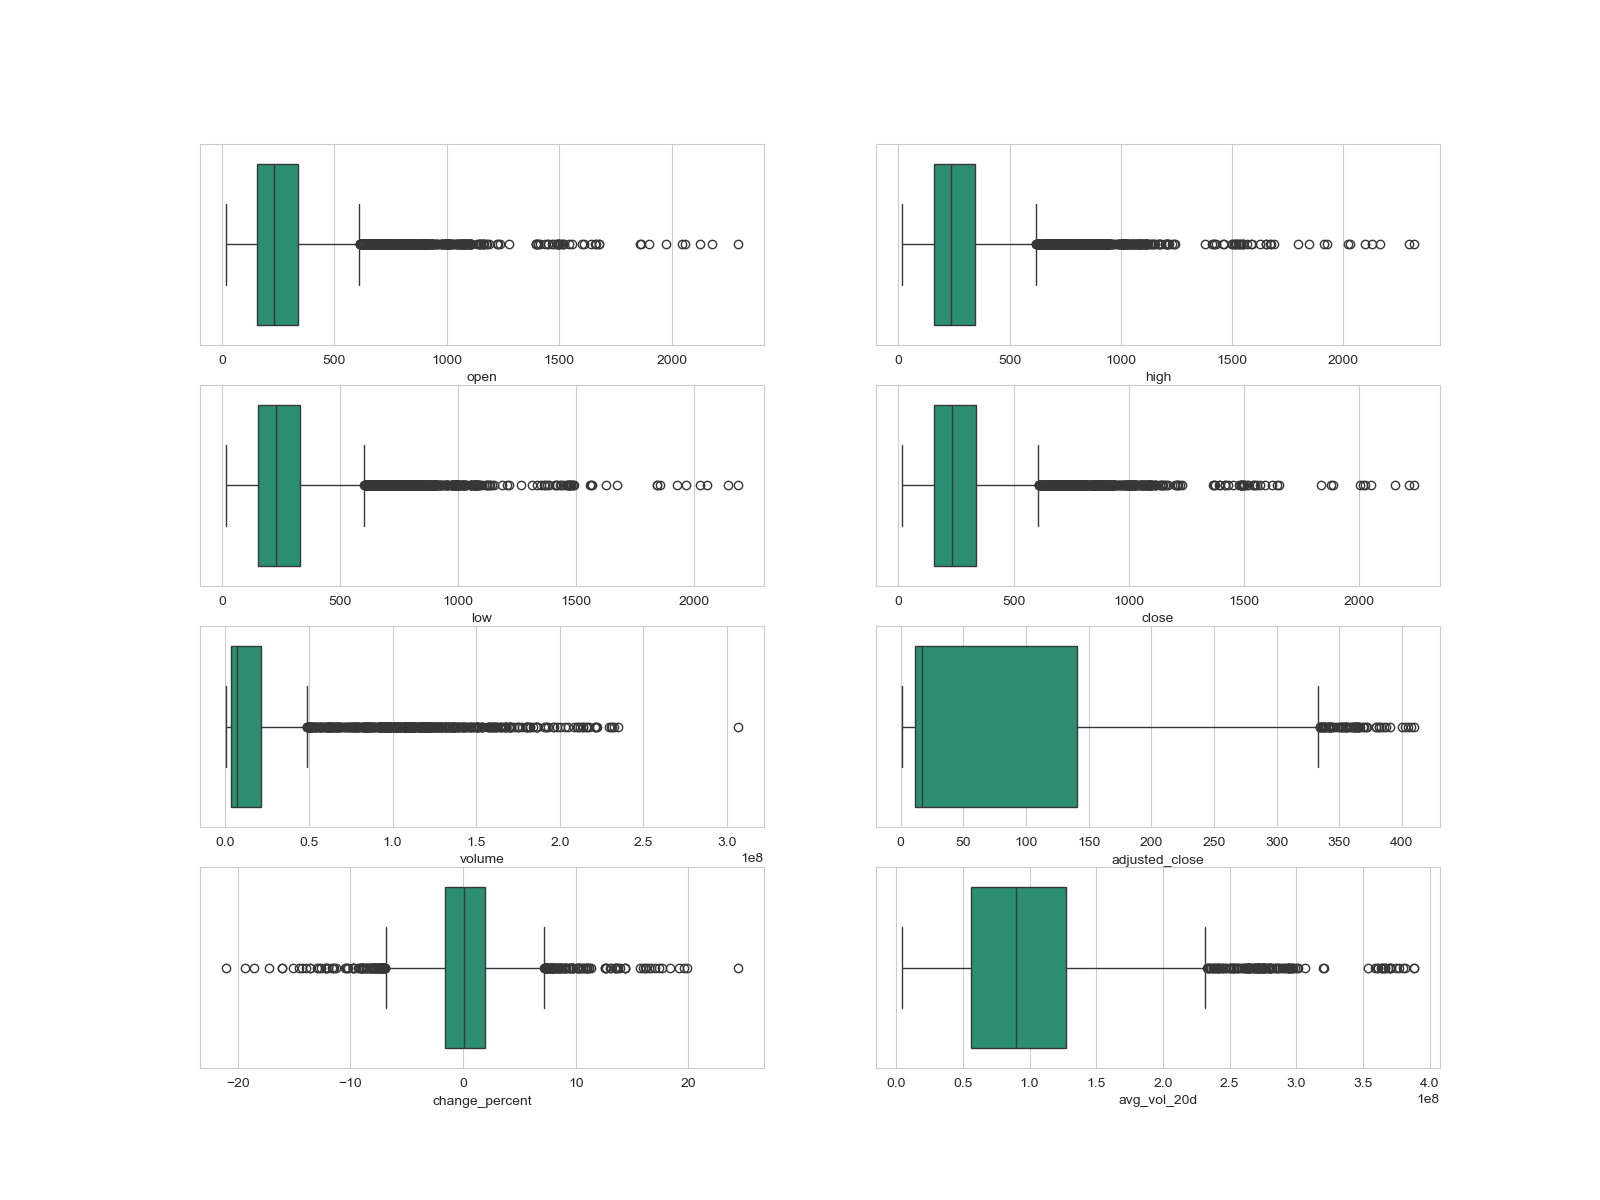

In [40]:
fig, ax = plt.subplots(4, 2, figsize=(16,12), sharey=False)

sns.boxplot(x=TS['open'], ax=ax[0][0])

sns.boxplot(x=TS['high'], ax=ax[0][1])


sns.boxplot(x=TS['low'], ax=ax[1][0])


sns.boxplot(x=TS['close'], ax=ax[1][1])


sns.boxplot(x=TS['volume'], ax=ax[2][0])


sns.boxplot(x=TS['adjusted_close'], ax=ax[2][1])

sns.boxplot(x=TS['change_percent'], ax=ax[3][0])

sns.boxplot(x=TS['avg_vol_20d'], ax=ax[3][1])

plt.show()

### **Outliers in Tesla stock data should not be removed because they reflect real market events,** 
**contribute to volatility and risk analysis, and capture critical insights like reactions to news or earnings.**
##### Removing them could misrepresent market behavior and lead to incorrect forecasts.**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### DISTRIBUTION OF DATASET

skewed or symmetrical

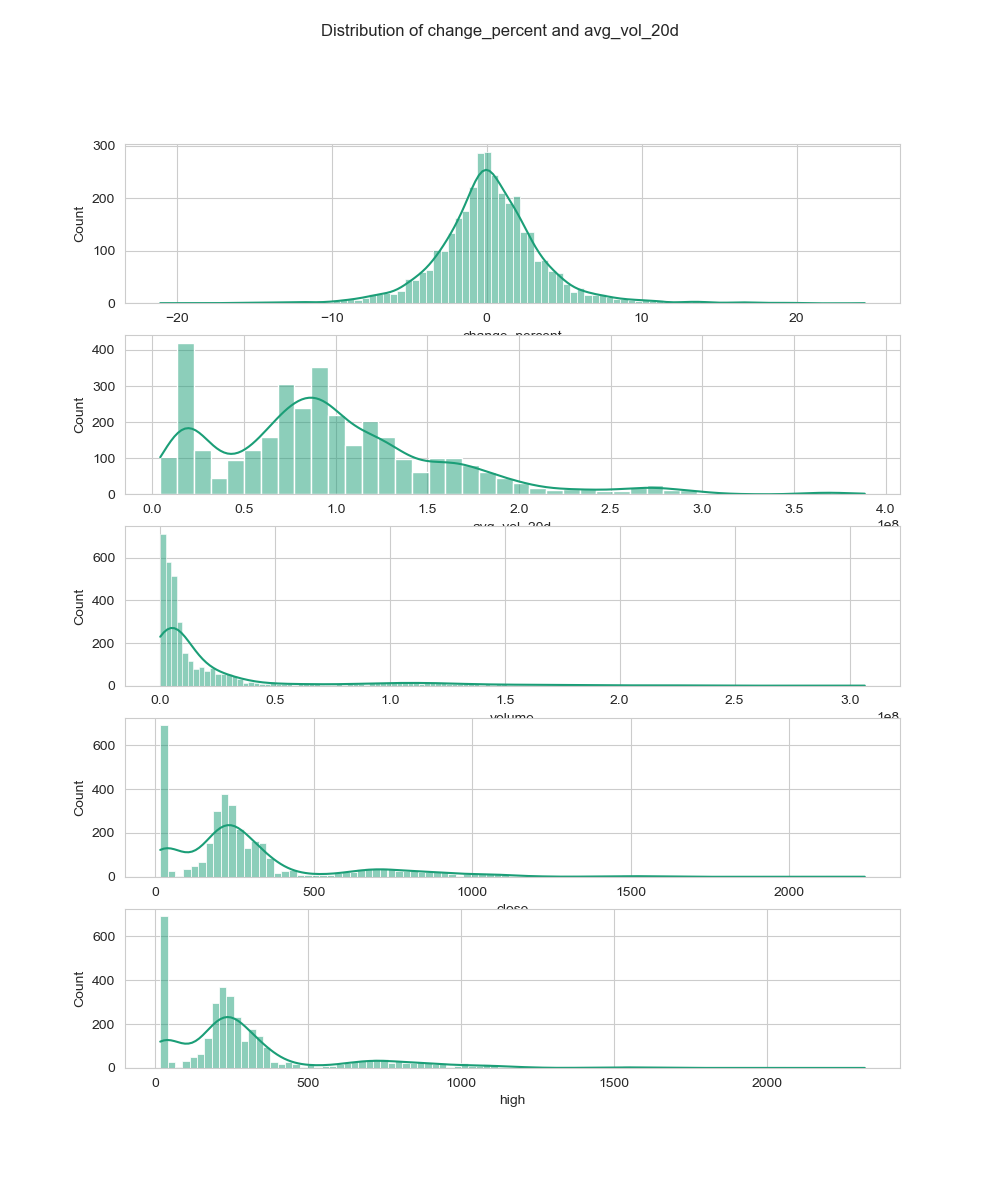

In [46]:
fig, ax = plt.subplots(5, 1, figsize=(10,12), sharey=False)

sns.histplot(x='change_percent', data=TS, ax=ax[0], kde=True)
sns.histplot(x='avg_vol_20d', data=TS, ax=ax[1], kde=True)
sns.histplot(x='volume', data=TS, ax=ax[2], kde=True)
sns.histplot(x='close', data=TS, ax=ax[3], kde=True)
sns.histplot(x='high', data=TS, ax=ax[4], kde=True)

fig.suptitle('Distribution of change_percent and avg_vol_20d')

plt.show()

1. as **change_percent** is normally distributed so we can use **mean** for it
2. as **avg_vol_20d** is **positively skewed** so for skewed data we can use **median** to fill data

##### BUT AT OUR BOTH COLUMN MISSING VALUE AT START 
> SO WE CAN REPLACE THEM WITH **0**

> OR REMOVE THAT RECORD FROM OUR DATASET

So we, removing that records from our datase

### Removing Missing Values

In [49]:
TS = TS[TS['change_percent'].notna() & TS['avg_vol_20d'].notna()]

In [50]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3453 entries, 19 to 3471
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3453 non-null   datetime64[ns]
 1   open            3453 non-null   float64       
 2   high            3453 non-null   float64       
 3   low             3453 non-null   float64       
 4   close           3453 non-null   float64       
 5   volume          3453 non-null   int64         
 6   adjusted_close  3453 non-null   float64       
 7   change_percent  3453 non-null   float64       
 8   avg_vol_20d     3453 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 269.8 KB


### our data is now cleaned

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Correlation Between Attributes

In [54]:
numeric_df = TS.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

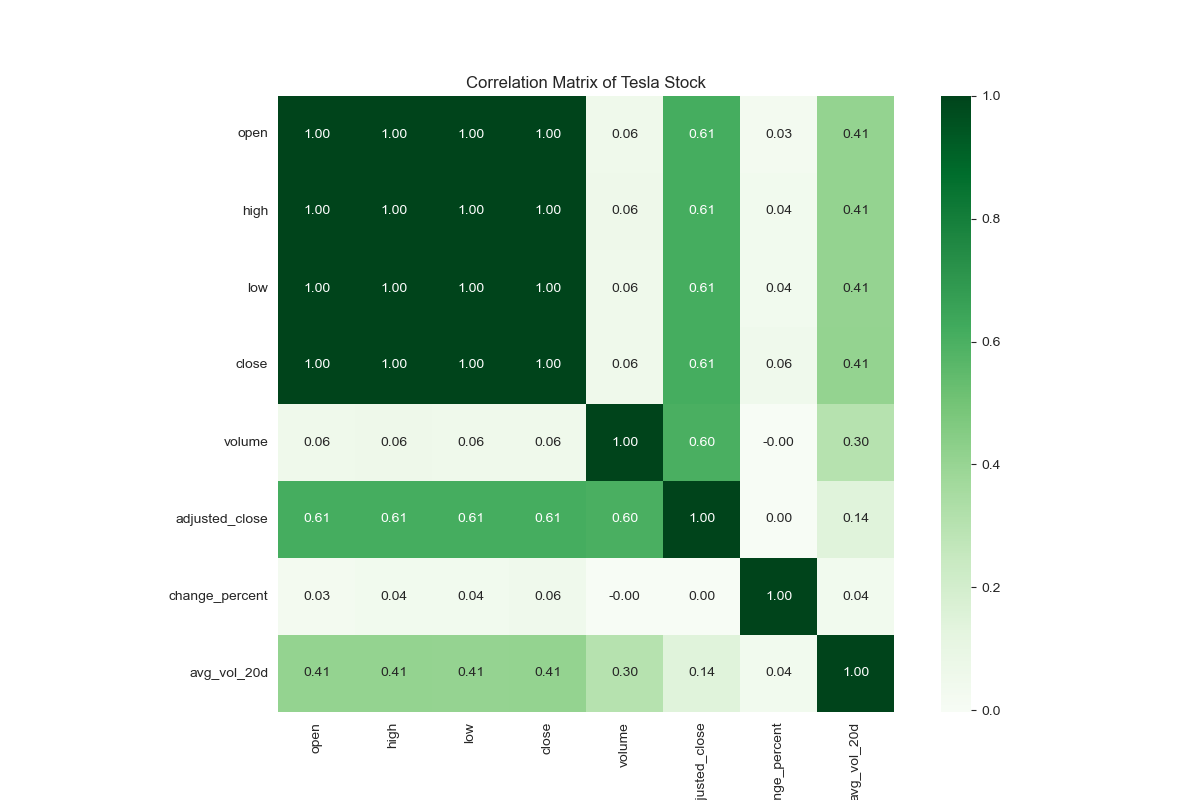

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', square=True)
plt.title('Correlation Matrix of Tesla Stock')
plt.show()

#### hence we see Open, High, low, close, high correlated with each so visualize it with scatterplot

### **since pearson correlation tells only linear relationship, so we have to verify it by scatter plot**

In [61]:
import warnings
warnings.filterwarnings("ignore")

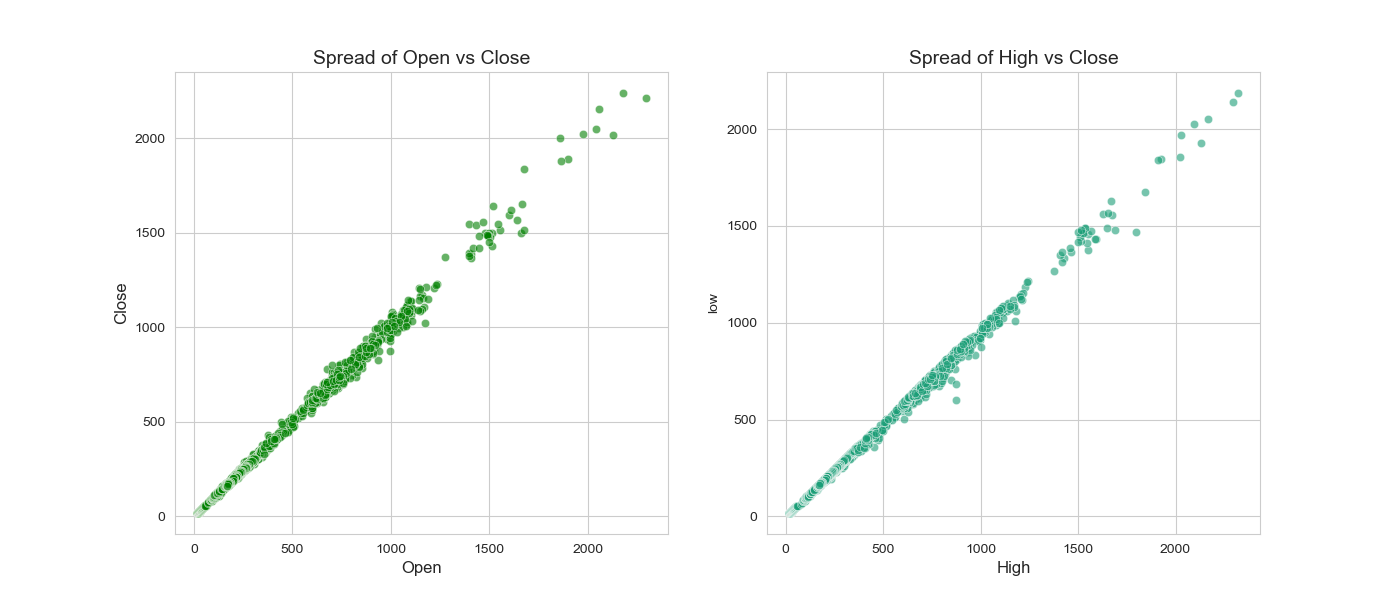

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Scatter plot for open vs close
sns.scatterplot(x='open', y='close', data=TS, ax=axes[0], color='green', alpha=0.6)
axes[0].set_title('Spread of Open vs Close', fontsize=14)
axes[0].set_xlabel('Open', fontsize=12)
axes[0].set_ylabel('Close', fontsize=12)

# Scatter plot for high vs close
sns.scatterplot(x='high', y='low', data=TS, ax=axes[1], alpha=0.6)
axes[1].set_title('Spread of High vs Close', fontsize=14)
axes[1].set_xlabel('High', fontsize=12)


plt.show()

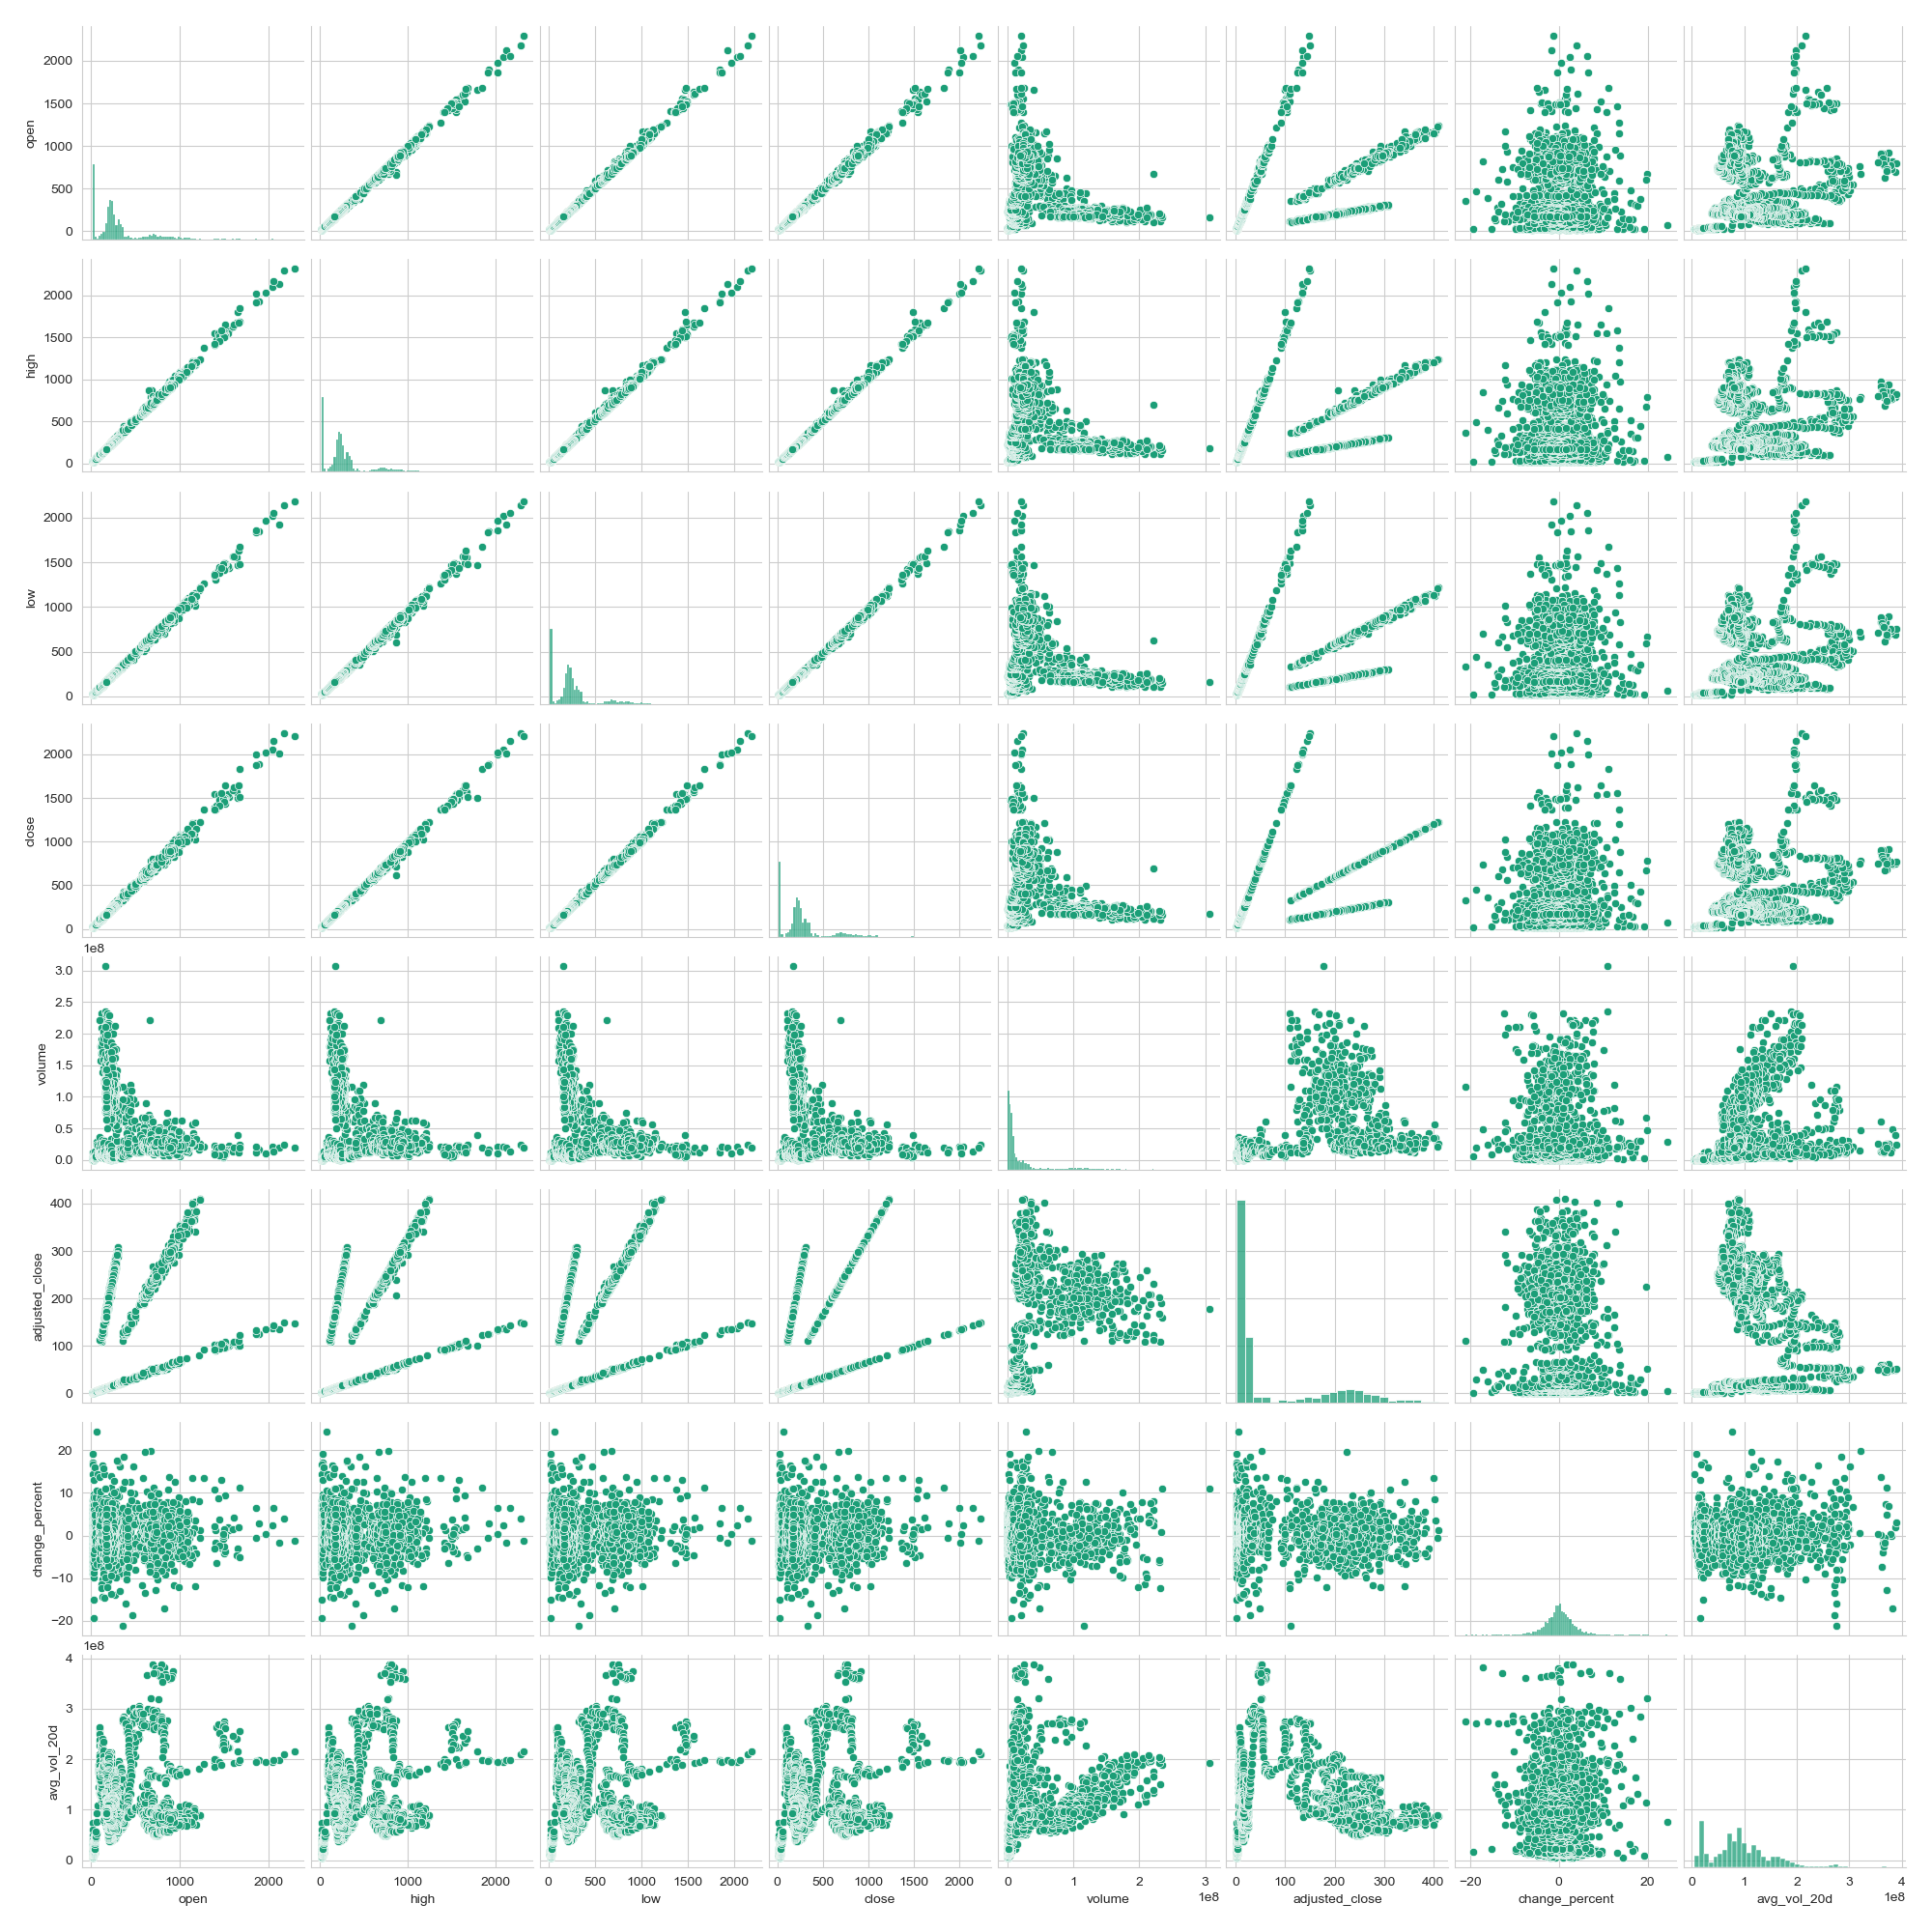

In [64]:
sns.pairplot(TS)
plt.show()

### Correlation Matrix of Tesla Stock

1. **Perfect Correlation (1.00)**:
   - **"Open," "High," "Low," and "Close"** prices are perfectly correlated, moving together consistently.

2. **Moderate Positive Correlation (0.61)**:
   - **"Adjusted Close" is moderately correlated with "Open," "High," "Low," and "Close,"** reflecting its dependence on these metrics.

3. **Weak Correlations**:
   - **"Volume" shows weak correlation (~0.06)** with price-related metrics.
   - **"Change Percent" is largely independent of other variables**, with correlations close to **0**.

4. **"Avg_vol_20d" Correlations**:
   - **Weak-to-moderate correlation (0.30–0.41) with price metrics**, suggesting a minor influence.

### Summary:
- Price metrics are highly interdependent, typical in stock data.
- Trading volume and price movements are largely unrelated.
- Adjusted close captures a summary of daily price activity adjusted for **splits/dividends**.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### TIME SERIES ANALYSIS OF CHANGE IN STOCK

### Adding new columns of change into new dataframe

In [72]:
TSC = TS.copy()

TSC['open_change'] = TS['open'] - TS['open'].shift(1)
TSC['high_change'] = TS['high'] - TS['high'].shift(1)
TSC['low_change'] = TS['low'] - TS['low'].shift(1)
TSC['close_change'] = TS['close'] - TS['close'].shift(1)
TSC['volume_change'] = TS['volume'] - TS['volume'].shift(1)
TSC['adjusted_close_change'] = TS['adjusted_close'] - TS['adjusted_close'].shift(1)
TSC['change_percent_change'] = TS['change_percent'] - TS['change_percent'].shift(1)
TSC['avg_vol_20d_change'] = TS['avg_vol_20d'] - TS['avg_vol_20d'].shift(1)

TSC.dropna(inplace=True)



In [73]:
TSC.head(2)

date     open     high      low    close  volume  adjusted_close  \
20 2010-07-28  20.5500  20.9001  20.5101  20.7201  467183          1.3813   
21 2010-07-29  20.7699  20.8800  20.0001  20.3499  615910          1.3567   

    change_percent  avg_vol_20d  open_change  high_change  low_change  \
20            0.82   60589147.1      -0.3600      -0.2799      0.2502   
21           -1.78   48155285.4       0.2199      -0.0201     -0.5100   

    close_change  volume_change  adjusted_close_change  change_percent_change  \
20        0.1701      -152492.0                 0.0113                   2.73   
21       -0.3702       148727.0                -0.0246                  -2.60   

    avg_vol_20d_change  
20         -13737071.4  
21         -12433861.7

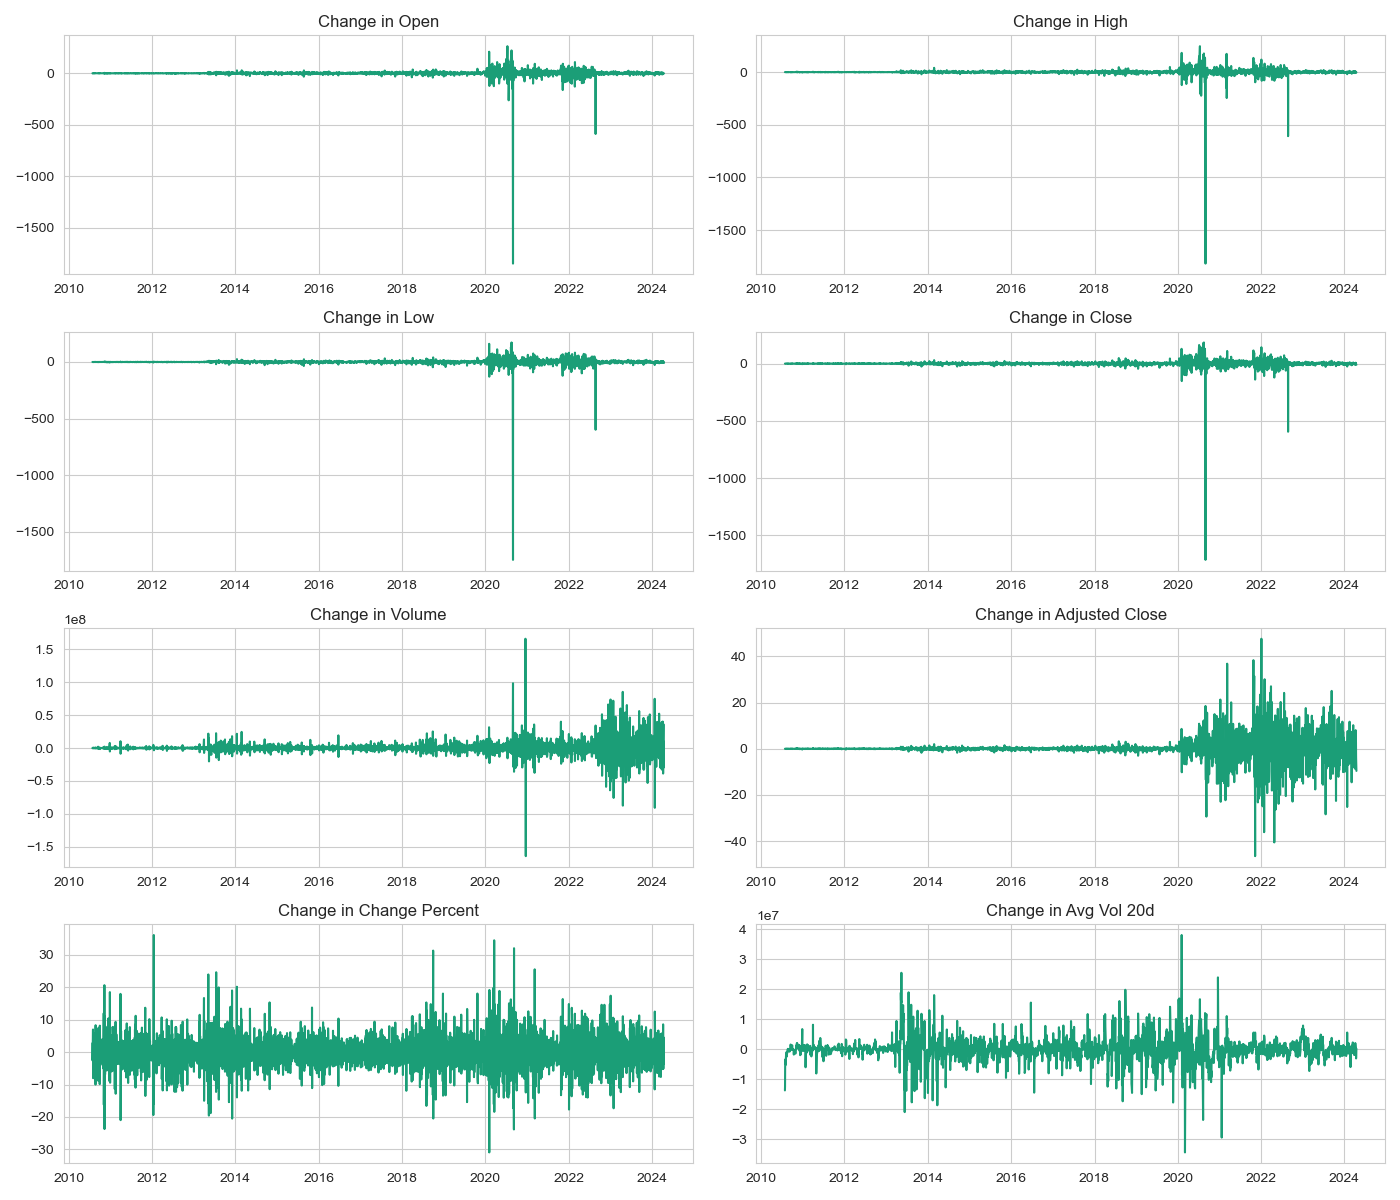

In [74]:
fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharey=False)


axes[0, 0].plot(TSC['date'], TSC['open_change'])
axes[0, 0].set_title('Change in Open', fontsize=12)

axes[0, 1].plot(TSC['date'], TSC['high_change'])
axes[0, 1].set_title('Change in High', fontsize=12)

axes[1, 0].plot(TSC['date'],TSC['low_change'])
axes[1, 0].set_title('Change in Low', fontsize=12)

axes[1, 1].plot(TSC['date'],TSC['close_change'])
axes[1, 1].set_title('Change in Close', fontsize=12)

axes[2, 0].plot(TSC['date'],TSC['volume_change'])
axes[2, 0].set_title('Change in Volume', fontsize=12)

axes[2, 1].plot(TSC['date'],TSC['adjusted_close_change'])
axes[2, 1].set_title('Change in Adjusted Close', fontsize=12)

axes[3, 0].plot(TSC['date'],TSC['change_percent_change'])
axes[3, 0].set_title('Change in Change Percent', fontsize=12)

axes[3, 1].plot(TSC['date'],TSC['avg_vol_20d_change'])
axes[3, 1].set_title('Change in Avg Vol 20d', fontsize=12)


plt.tight_layout()


plt.show()

This image contains eight time-series plots tracking changes in various financial metrics over time (2010–2024). Here's a concise breakdown:

> Change in Open, High, Low, Close: Small fluctuations dominate with notable outliers, especially post-2020.

> Change in Volume & Adjusted Close: Increased volatility is visible around 2020–2022.

> Change Percent: Features scattered peaks, indicating intermittent spikes.

> Change in Avg Vol 20d: Periodic spikes suggest significant trading activity over certain intervals.

so, we segregating our data from where actual changes being

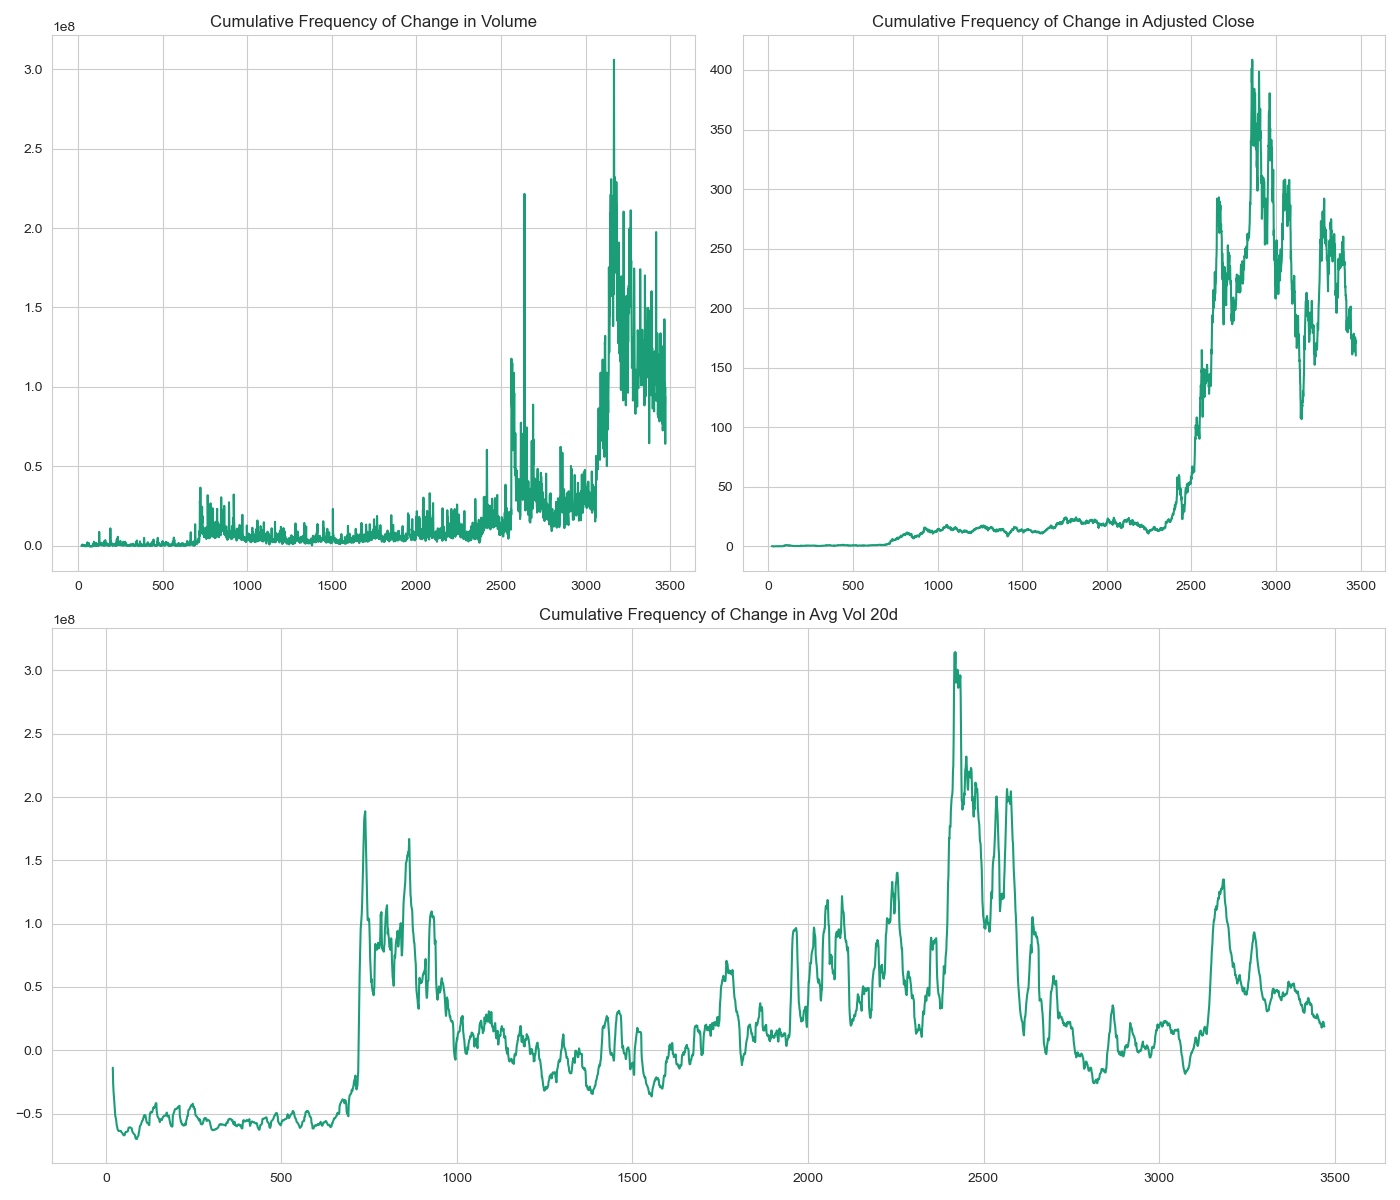

In [77]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14, 12))
gs = GridSpec(2, 2, figure=fig)


ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(TSC['volume_change'].cumsum())
ax1.set_title('Cumulative Frequency of Change in Volume', fontsize=12)


ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(TSC['adjusted_close_change'].cumsum())
ax2.set_title('Cumulative Frequency of Change in Adjusted Close', fontsize=12)

ax3 = fig.add_subplot(gs[1, :])  
ax3.plot(TSC['avg_vol_20d_change'].cumsum())
ax3.set_title('Cumulative Frequency of Change in Avg Vol 20d', fontsize=12)


plt.tight_layout()


plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### TIME SERIES ANALYSIS OF TESLA STOCK

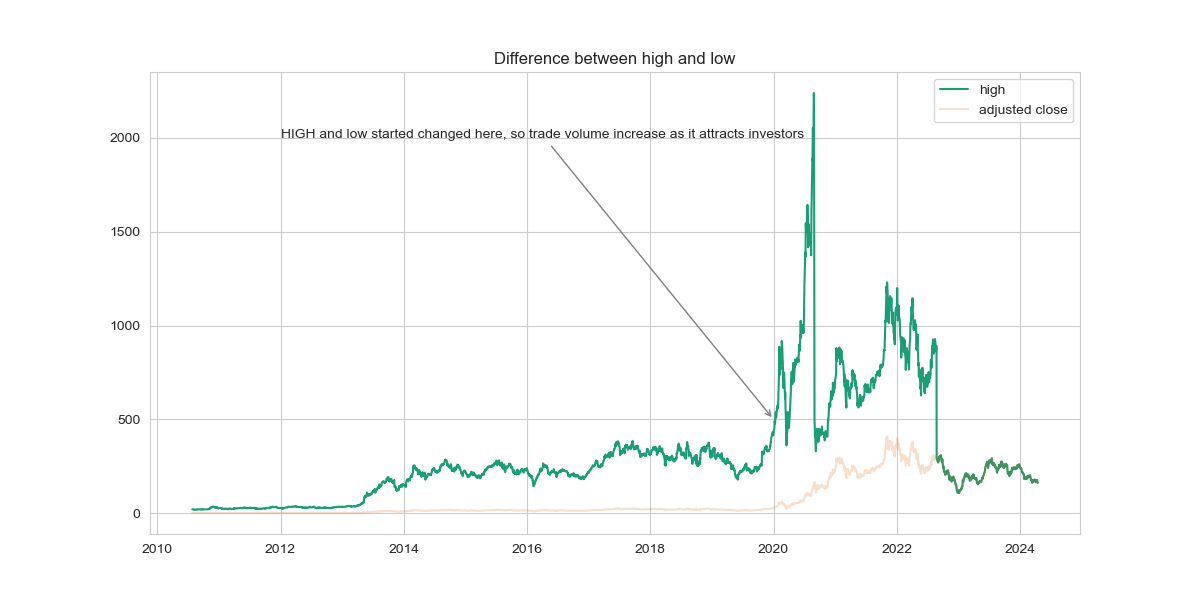

In [80]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(TS['date'], TS['close'], label='high')
ax.plot(TS['date'], TS['adjusted_close'], label='adjusted close', alpha=0.2)


ax.annotate("HIGH and low started changed here, so trade volume increase as it attracts investors",
             xy=(pd.Timestamp('2020-01-01'), 500),
             xytext=(pd.Timestamp('2012-01-01'), 2000),
             arrowprops={"arrowstyle": "->", "color": "gray"})

ax.set_title('Difference between high and low')

plt.legend()
plt.show()

### DATA SPLIT
**BY FROM CHANGE OCCURS**

In [82]:
TS1 = TS[(TS['date'] > '2010-01-01') & (TS['date'] < '2020-01-01')]
TS2 = TS[TS['date'] >= '2020-01-01']

##### So, our graph is now

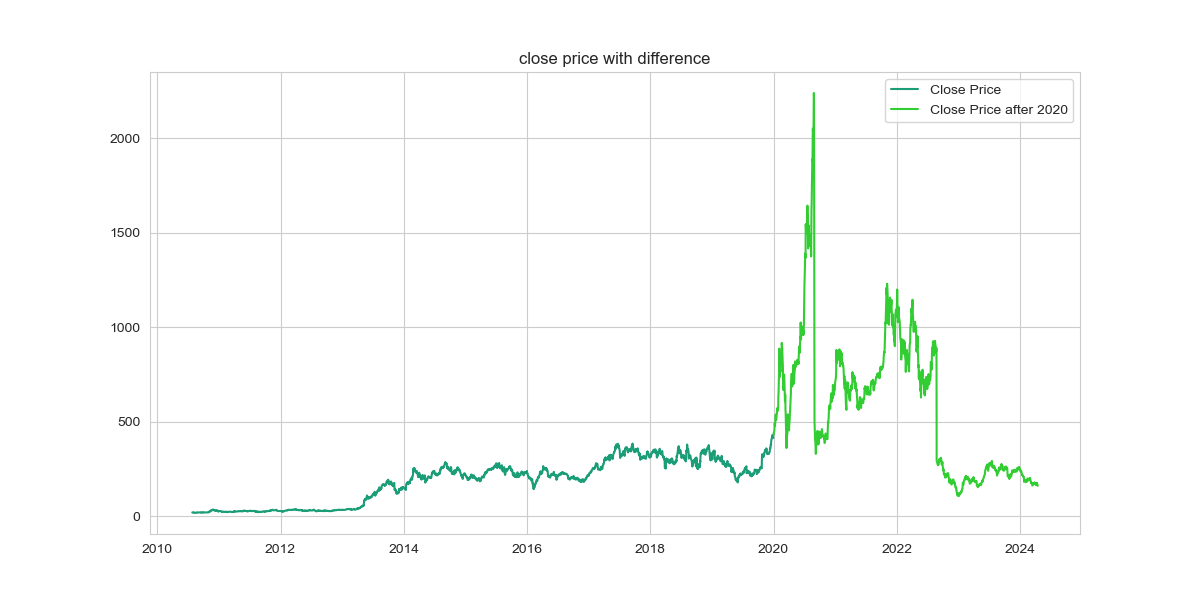

In [84]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(TS1['date'], TS1['close'], label='Close Price')
ax.plot(TS2['date'], TS2['close'], label='Close Price after 2020', c='limegreen')

ax.set_title('close price with difference')

plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### FORECASTING - CHOSSING PERFECT MODEL

In [87]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### ARIMA 

In [89]:
result = adfuller(TS["close"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -3.024202867961303
p-value: 0.03269514605753152


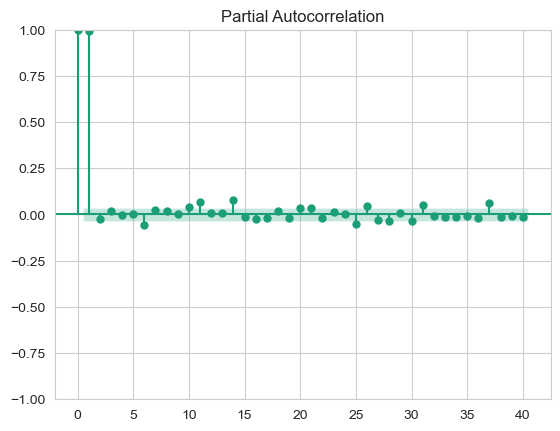

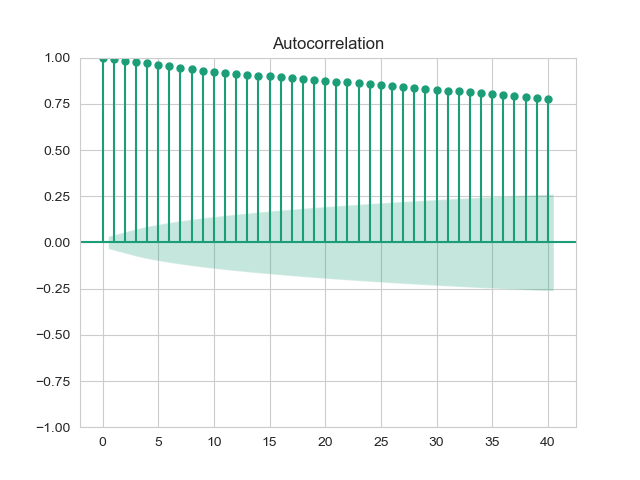

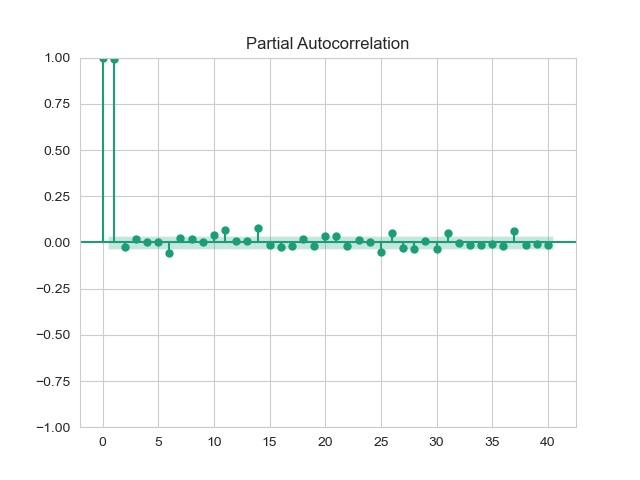

In [90]:
plot_acf(TS["close"], lags=40)
plot_pacf(TS["close"], lags=40)

### Reason for Not Using ARIMA
ARIMA was not used because the data lacked significant autocorrelation, as indicated by the
#### No autocorrelation function (ACF) 

values remaining below the threshold necessary for effective time-series modeling. Without strong autocorrelation, 

#### ARIMA cannot accurately capture patterns in the data.

### XGBOOST

In [93]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'Close' is the target variable
X = TS[['open', 'high', 'low', 'adjusted_close']]
y = TS['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.

In [95]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 8.447233858459269


In [96]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 71.35575985950065


In [97]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')


MAE: 3.3958724539021166


In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.99916103848947


In [99]:
X_train = sm.add_constant(X_train) 

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.185e+06
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        04:03:48   Log-Likelihood:                -9277.8
No. Observations:                2762   AIC:                         1.857e+04
Df Residuals:                    2757   BIC:                         1.860e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4865      0.198     -2.

#### OLS Regression Results Summary
R-squared: 0.999: Model explains 99.9% of the variance in the dependent variable.

Adj. R-squared: 0.999: Similar to R-squared, indicating a good fit.

F-statistic: 9.492e+05, Prob(F-statistic): 0.00: Model is statistically significant.

AIC: 1.856e+04, BIC: 1.860e+04: Low values indicating a good model.

Coefficients:
const: -0.7120 (p-value = 0.001)

open: -0.5640 (p-value = 0.000)

high: 0.6585 (p-value = 0.000)

low: 0.9145 (p-value = 0.000)

volume: 1.082e-08 (p-value = 0.023)

adjusted_close: -0.0042 (p-value = 0.075)

Diagnostic Tests:

Durbin-Watson: 1.966: No autocorrelation.

Omnibus: 2319.727, Prob(Omnibus): 0.000: Non-normal residuals.

Jarque-Bera: 735929.915, Prob(JB): 0.000: Residuals not normal.

Condition Number: 7.94e+07: Possible multicollinearity issues.

Conclusion:
The model has an excellent fit, but potential issues with multicollinearity and non-normal residuals should be addressed.

### Reasoning since we hadn't remove outliears or our data is skewed so non-normal residual is coming, 

### secondly multicollineatiy is coming because as we know our independent variable was correlated

### Multicollinearity
**Multicollinearity was retained as features like open, high, low, and close are inherently interrelated in stock data.**

**Removing them could compromise predictive accuracy, making their inclusion essential for reliable modeling.**

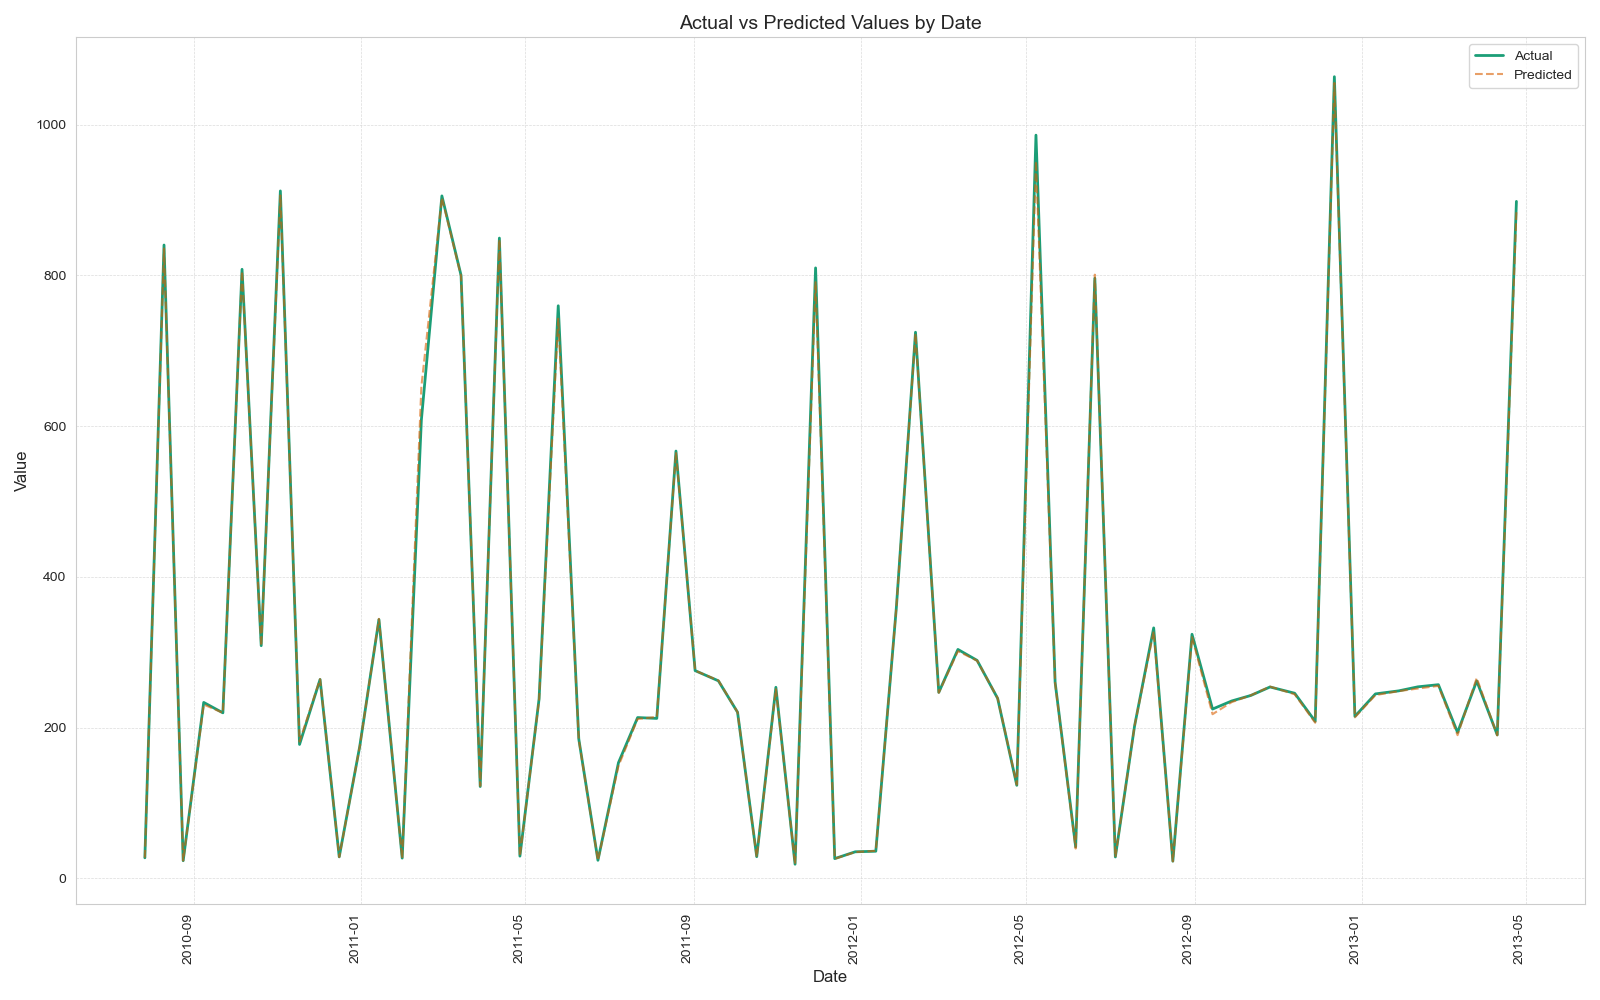

In [102]:
plt.figure(figsize=(16, 10))

# Plot actual vs predicted values with respect to 'date' for the test set
step = 10
downsampled_dates = TS['date'].iloc[:len(y_test)][::step]
downsampled_actual = y_test[::step]
downsampled_predicted = y_pred[::step]

# Plot actual vs predicted values with respect to 'date' for the test set
plt.plot(downsampled_dates, downsampled_actual, label='Actual', linewidth=2)
plt.plot(downsampled_dates, downsampled_predicted, label='Predicted', alpha=0.6, linestyle='--', linewidth=1.5)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Actual vs Predicted Values by Date', fontsize=14)
plt.legend()

# Improve layout and make the date labels readable
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=10)


print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.98037078 0.9880407  0.99842722 0.99209158 0.99760072 0.98668117
 0.99897073 0.99757013 0.99822902 0.9966212 ]
Mean CV score: 0.9934603239941413


### **Cross-Validation Scores**  
- **Scores**: [0.9494, 0.9693, 0.9984, 0.9921, 0.9976, 0.9865, 0.9990, 0.9976, 0.9982, 0.9728]  
- **Mean CV Score**: 0.9861  

These results indicate strong model consistency and high predictive performance across all validation folds.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X1 = TS[['open', 'high', 'low', 'volume', 'adjusted_close']]
y1 = TS['close']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


# Create a Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm_model.fit(X1_train, y1_train)


GradientBoostingRegressor(random_state=42)


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.


In [108]:
y1_pred = gbm_model.predict(X1_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f'RMSE: {rmse}')

RMSE: 71.35575985950065


In [109]:
mae1 = mean_absolute_error(y1_test, y1_pred)
print(f'MAE: {mae}')


MAE: 3.3958724539021166


In [110]:
r21 = r2_score(y1_test, y1_pred)
print(f'R²: {r2}')

R²: 0.99916103848947


In [111]:
X1_train = sm.add_constant(X1_train) 

model1 = sm.OLS(y1_train, X1_train).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.492e+05
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        04:03:49   Log-Likelihood:                -9275.2
No. Observations:                2762   AIC:                         1.856e+04
Df Residuals:                    2756   BIC:                         1.860e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7120      0.221     -3.

### **Reason for Not Using Gradient Boosting Regressor (GBR)**  
While both XGBoost and GBR produced similar results, XGBoost was chosen due to its superior performance with large datasets. XGBoost's optimized implementation, faster training, and ability to handle large-scale data efficiently make it better suited for this project.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [124]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model2 = LinearRegression()
model2.fit(X, y)


LinearRegression()

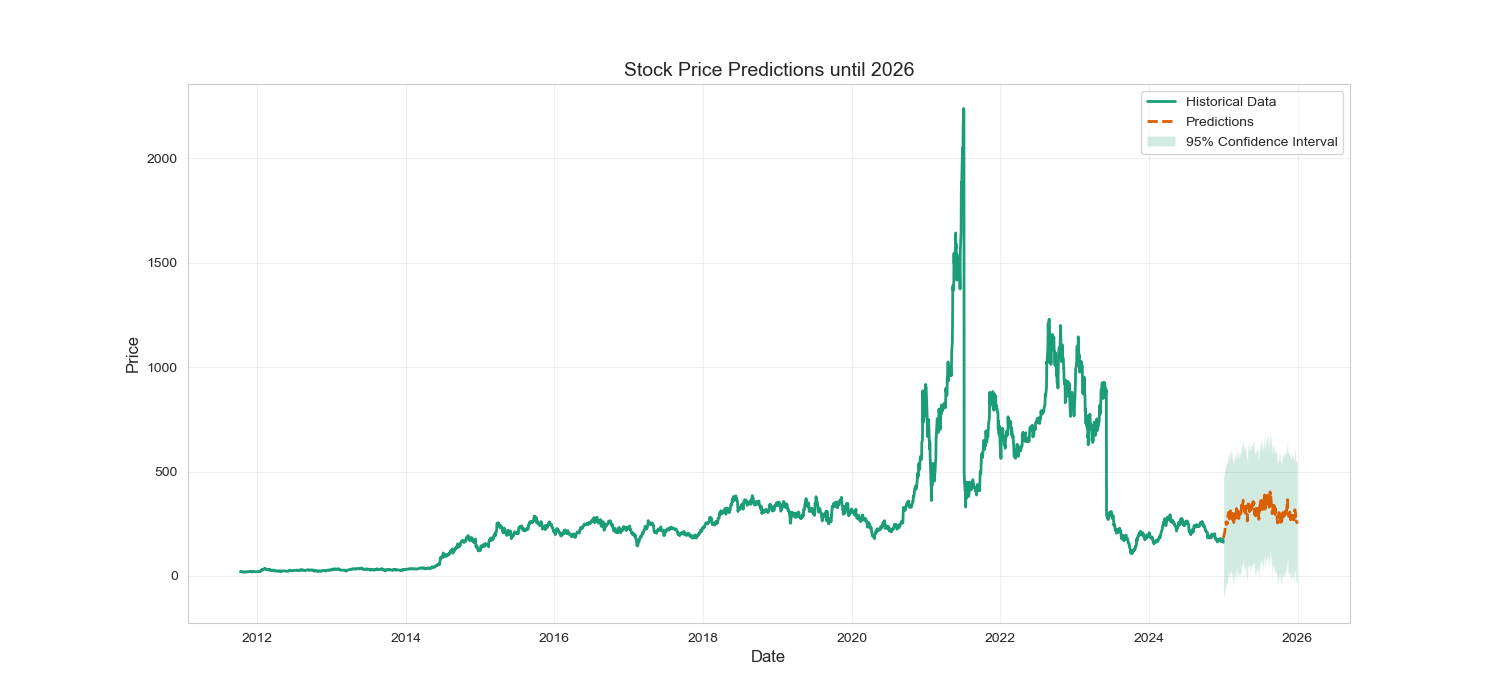

In [126]:
def create_future_predictions(df, model, end_date='2025-12-31'):
    TS = df.copy()
    
   
    current_date = pd.Timestamp.now()
    historical_dates = pd.date_range(end=current_date, periods=len(TS), freq='B')
    TS.index = historical_dates
    
    
    historical_daily_returns = TS['close'].pct_change()
    historical_volatility = historical_daily_returns.std()
    avg_daily_trend = historical_daily_returns.mean()
    
    
    avg_daily_high_change = (TS['high'] / TS['open'] - 1).mean()
    avg_daily_low_change = (TS['low'] / TS['open'] - 1).mean()
    
    last_date = TS.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                               end=end_date, 
                               freq='B')
    
    future_df = pd.DataFrame(index=future_dates)
    last_values = TS.iloc[-1]
    
    
    future_df.loc[future_dates[0], 'open'] = last_values['close']
    
   
    def generate_price_movement(base_price):
        
        random_walk = np.random.normal(avg_daily_trend, historical_volatility)
        movement = base_price * (1 + random_walk)
        
        
        mean_price = TS['close'].mean()
        reversion_factor = 0.1  
        mean_reversion = (mean_price - base_price) * reversion_factor
        
        return movement + mean_reversion
    
    
    predictions = []
    last_pred = last_values['close']
    
    for date in future_dates:
        
        current_open = generate_price_movement(last_pred)
        current_high = current_open * (1 + abs(np.random.normal(avg_daily_high_change, historical_volatility)))
        current_low = current_open * (1 + np.random.normal(avg_daily_low_change, historical_volatility))
        current_volume = np.random.normal(TS['volume'].mean(), TS['volume'].std())
        
        
        current_high = max(current_high, current_open)
        current_low = min(current_low, current_open)
        current_volume = max(current_volume, 0)
        
        
        future_df.loc[date, 'open'] = current_open
        future_df.loc[date, 'high'] = current_high
        future_df.loc[date, 'low'] = current_low
        future_df.loc[date, 'volume'] = current_volume
        future_df.loc[date, 'adjusted_close'] = current_open 
        
        
        features = future_df.loc[date, ['open', 'high', 'low',  'adjusted_close']]
        pred = model.predict(features.values.reshape(1, -1))[0]
        predictions.append(pred)
        last_pred = pred
    
    future_df['predicted_close'] = predictions
    
    
    historical = TS[['close']].copy()
    historical.columns = ['actual_close']
    future_predictions = future_df[['predicted_close']]
    combined_df = pd.concat([historical, future_predictions])
    
    return combined_df

# Generate predictions
predictions_df = create_future_predictions(TS, model)




plt.figure(figsize=(15, 7))
plt.plot(predictions_df.index, predictions_df['actual_close'], 
         label='Historical Data', linewidth=2)
plt.plot(predictions_df.index, predictions_df['predicted_close'], 
         label='Predictions', linestyle='--', linewidth=2)

# Add confidence interval
if 'predicted_close' in predictions_df.columns:
    future_prices = predictions_df['predicted_close'].dropna()
    dates = future_prices.index
    
    # Calculate confidence intervals
    std_dev = predictions_df['actual_close'].std()
    plt.fill_between(dates, 
                    future_prices - 1.0*std_dev, 
                    future_prices + 1.0*std_dev, 
                    alpha=0.2,
                    label='95% Confidence Interval')

plt.title('Stock Price Predictions until 2026', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

In [120]:
def predict_stock_price(userDate, open_value, high_value, low_value, adjusted_close_value, model):
    
    
    start_date = pd.Timestamp(userDate)

    
    input_features = np.array([open_value, high_value, low_value, adjusted_close_value]).reshape(1, -1)

    
    predicted_close = model.predict(input_features)[0]

    
    print(f"\nFor the date {userDate}:")
    print(f"Open: {open_value}, High: {high_value}, Low: {low_value}, Adjusted Close: {adjusted_close_value}")
    print(f"\nThe predicted closing price for {userDate} is: {predicted_close:.2f}")
    
    return predicted_close

# Example usage:
user_date = '2026-06-20'
open_value = float(input("Enter the Open value: "))
high_value = float(input("Enter the High value: "))
low_value = float(input("Enter the Low value: "))
adjusted_close_value = float(input("Enter the Adjusted Close value: "))

predicted_close = predict_stock_price(user_date, open_value, high_value, low_value, adjusted_close_value, model)


Enter the Open value:  900
Enter the High value:  1500
Enter the Low value:  400
Enter the Adjusted Close value:  1



For the date 2026-06-20:
Open: 900.0, High: 1500.0, Low: 400.0, Adjusted Close: 1.0

The predicted closing price for 2026-06-20 is: 865.41


In [ ]:
import plotly.graph_objects as go
from datetime import timedelta

def interactive_graphs(userDate):

    user_entered_date = userDate
    start_date = pd.Timestamp(user_entered_date)
    one_month_prior = start_date - pd.Timedelta(days=30)
    
    
    filtered_df = predictions_df.loc[one_month_prior:start_date]
    
    
    fig = go.Figure()
    
   
    fig.add_trace(go.Scatter(
        x=filtered_df.index,
        y=filtered_df['actual_close'],
        mode='lines',
        name='Historical Data',
        line=dict(width=2, color='rgba(72, 201, 176 ,1)'),
    ))
    
    
    fig.add_trace(go.Scatter(
        x=filtered_df.index,
        y=filtered_df['predicted_close'],
        mode='lines',
        name='Predictions',
        line=dict(width=2, dash='dash', color='rgba(72, 201, 176 ,1)')
    ))
    
    
    if 'predicted_close' in predictions_df.columns:
        future_prices = filtered_df['predicted_close'].dropna()
        std_dev = predictions_df['actual_close'].std()
        fig.add_trace(go.Scatter(
            x=future_prices.index.tolist() + future_prices.index[::-1].tolist(),
            y=(future_prices + 0.2 * std_dev).tolist() + (future_prices - 0.2 * std_dev).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(72, 201, 176, 0.15)',
            line=dict(color='rgba(272, 201, 176 ,0)'),
            name='Confidence Interval'
        ))
    
    
    fig.update_layout(
        title=f'Stock Price Predictions until {user_entered_date}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
        template='plotly_white'
    )
    
    
    fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
    fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
    fig.show()


DateF = input("Enter the Date value: ")


Date = pd.to_datetime(DateF)


usedata = interactive_graphs(Date)
